# 🤔 Цели исследования
- Оцените корректность проведения теста
- Проанализируйте результаты теста:
    - пересечение тестовой аудитории с конкурирующим тестом,
    - совпадение теста и маркетинговых событий, другие проблемы временных границ теста.

## ✍🏻 Техническое задание

- Название теста: `recommender_system_test`;
- группы: А — контрольная, B — новая платёжная воронка;
- дата запуска: 2020-12-07;
- дата остановки набора новых пользователей: 2020-12-21;
- дата остановки: 2021-01-04;
- аудитория: 15% новых пользователей из региона EU;
- назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
- ожидаемое количество участников теста: 6000.
- ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:
    - конверсии в просмотр карточек товаров — событие `product_page`,
    - просмотры корзины — `product_cart`,
    - покупки — `purchase`.

# 📚 1. Импорт

In [ ]:
import pandas as pd
import numpy as np
import math as mth

import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.express as px
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})
import scipy.stats as stats
from scipy import stats as st
from plotly import graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

# 🛒 2. Загрузка файла

In [ ]:
!gdown 1L9pcccB81ksRQ9hbMhyNxd44FEZhjIYi
!gdown 1fKgeXypRKUjttQiYiT9KBdQ2P8uvJfaZ
!gdown 1jvfy3QX349_T8KBjXt7uXrJEDXD-oKrS
!gdown 19JEGH4OyHGmXN9vsoQUhbBBSYcRvmU0w

Downloading...
From: https://drive.google.com/uc?id=1L9pcccB81ksRQ9hbMhyNxd44FEZhjIYi
To: /content/final_ab_participants.csv
100% 716k/716k [00:00<00:00, 110MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fKgeXypRKUjttQiYiT9KBdQ2P8uvJfaZ
To: /content/final_ab_new_users.csv
100% 2.37M/2.37M [00:00<00:00, 158MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jvfy3QX349_T8KBjXt7uXrJEDXD-oKrS
To: /content/final_ab_events.csv
100% 22.3M/22.3M [00:00<00:00, 109MB/s] 
Downloading...
From: https://drive.google.com/uc?id=19JEGH4OyHGmXN9vsoQUhbBBSYcRvmU0w
To: /content/ab_project_marketing_events.csv
100% 879/879 [00:00<00:00, 1.48MB/s]


# 💡 3. Описание данных и предобработка

In [ ]:
marketing_events = pd.read_csv('/content/ab_project_marketing_events.csv')

In [ ]:
marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [ ]:
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'], format="%Y-%m-%d")
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'], format="%Y-%m-%d")

In [ ]:
marketing_events.duplicated().sum()

0

In [ ]:
events = pd.read_csv('/content/final_ab_events.csv')

In [ ]:
events

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
440312,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
440313,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
440314,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
440315,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


In [ ]:
events['event_dt'] = pd.to_datetime(events['event_dt'], format="%Y-%m-%d %H:%M:%S")

In [ ]:
events.query('event_name == "purchase"')['details'].isna().sum()

0

In [ ]:
events.query('event_name != "purchase"')['details'].sum()

0.0

In [ ]:
events.describe().T

,count,mean,std,min,25%,50%,75%,max
details,62740.0,23.877631,72.180465,4.99,4.99,4.99,9.99,499.99


In [ ]:
events.groupby('event_name')['details'].agg(['count', 'mean'])

,count,mean
event_name,,
login,0,NaN
product_cart,0,NaN
product_page,0,NaN
purchase,62740,23.877631


- везде пропуски кроме "purchase"
- details отображает сколько заплатил пользователь на конкретном этапе, если там пропуск то значит не платил, заполним 0 

In [ ]:
events = events.fillna(0)

In [ ]:
events.duplicated(subset=('user_id', 'event_dt', 'event_name')).sum()

0

In [ ]:
new_users = pd.read_csv('/content/final_ab_new_users.csv')

In [ ]:
new_users

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
61728,1DB53B933257165D,2020-12-20,EU,Android
61729,538643EB4527ED03,2020-12-20,EU,Mac
61730,7ADEE837D5D8CBBD,2020-12-20,EU,PC
61731,1C7D23927835213F,2020-12-20,EU,iPhone


In [ ]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


In [ ]:
new_users['first_date'] = pd.to_datetime(new_users['first_date'], format="%Y-%m-%d")

In [ ]:
new_users.duplicated().sum()

0

In [ ]:
new_users.duplicated(subset=('user_id', 'region')).sum()

0

In [ ]:
participants = pd.read_csv('/content/final_ab_participants.csv')

In [ ]:
participants

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
...,...,...,...
18263,1D302F8688B91781,B,interface_eu_test
18264,3DE51B726983B657,A,interface_eu_test
18265,F501F79D332BE86C,A,interface_eu_test
18266,63FBE257B05F2245,A,interface_eu_test


In [ ]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


In [ ]:
participants.duplicated().sum()

0

In [ ]:
participants.duplicated(subset=('user_id', 'ab_test')).sum()

0

## 3.1 Время проведения теста.

In [ ]:
raw_df = participants.merge(new_users, how='left', on='user_id')
raw_df

,user_id,group,ab_test,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC
1,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone
2,DABC14FDDFADD29E,A,recommender_system_test,2020-12-08,EU,Mac
3,04988C5DF189632E,A,recommender_system_test,2020-12-14,EU,iPhone
4,482F14783456D21B,B,recommender_system_test,2020-12-14,EU,PC
...,...,...,...,...,...,...
18263,1D302F8688B91781,B,interface_eu_test,2020-12-15,EU,PC
18264,3DE51B726983B657,A,interface_eu_test,2020-12-07,EU,Android
18265,F501F79D332BE86C,A,interface_eu_test,2020-12-17,EU,Mac
18266,63FBE257B05F2245,A,interface_eu_test,2020-12-20,EU,Android


In [ ]:
raw_df['first_date'].min()

Timestamp('2020-12-07 00:00:00')

In [ ]:
raw_df['first_date'].max()

Timestamp('2020-12-23 00:00:00')

- в данных есть пользователи которые присоеденились к тесту после 2020-12-21 когда набор новых польpователей должен быть закончен.
- очистим данные и запишем в новую таблицу

In [ ]:
df = raw_df.query('first_date <= "2020-12-21"')
df.head()

,user_id,group,ab_test,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC
1,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone
2,DABC14FDDFADD29E,A,recommender_system_test,2020-12-08,EU,Mac
3,04988C5DF189632E,A,recommender_system_test,2020-12-14,EU,iPhone
4,482F14783456D21B,B,recommender_system_test,2020-12-14,EU,PC


In [ ]:
marketing_events.sort_values('start_dt', ascending=False)

,name,regions,start_dt,finish_dt
10,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
12,Single's Day Gift Promo,APAC,2020-11-11,2020-11-12
13,Chinese Moon Festival,APAC,2020-10-01,2020-10-07
4,4th of July Promo,N.America,2020-07-04,2020-07-11
11,Dragon Boat Festival Giveaway,APAC,2020-06-25,2020-07-01
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19


In [ ]:
start = raw_df.query('ab_test != "recommender_system_test"')['first_date'].min()
start

Timestamp('2020-12-07 00:00:00')

In [ ]:
end = raw_df.query('ab_test != "recommender_system_test"')['first_date'].max()
end

Timestamp('2020-12-23 00:00:00')

In [ ]:
raw_df.query('(@start < first_date > @end) and (ab_test != "recommender_system_test")')

,user_id,group,ab_test,first_date,region,device


- дата проведения нашего теста и конкурирующего не пересекаются

## 3.1 Аудитория теста, равномерность распредления. 

In [ ]:
raw_df[raw_df.duplicated(subset=('user_id', 'group'))]['user_id'].nunique()

826

- найдено 826 уникальныйх пользователей, которые состоят в обоих группах
- создадим список этих пользователей
- уберем их и запишем в новую таблицу df

In [ ]:
duplicated_list = raw_df[raw_df.duplicated(subset=('user_id', 'group'))]['user_id'].tolist()

In [ ]:
df = df.query('user_id != @duplicated_list')

In [ ]:
raw_df.shape

(18268, 6)

In [ ]:
df.shape

(15614, 6)

In [ ]:
raw_df.query('ab_test == "recommender_system_test"').groupby(['group'])['user_id'].agg(['nunique']).reset_index()

,group,nunique
0,A,3824
1,B,2877


In [ ]:
q = raw_df.query('ab_test == "recommender_system_test"').groupby(['group'])['user_id'].agg(['nunique']).reset_index()
q['pct'] = q['nunique'] / q['nunique'].sum()
a = q['nunique'][0]
b = q['nunique'][1]
print(f'Группа А {a} пользователя, по сырым данным')
print(f'Группа В {b} пользователя, по сырым данным')

Группа А 3824 пользователя, по сырым данным
Группа В 2877 пользователя, по сырым данным


In [ ]:
q = df.query('ab_test == "recommender_system_test"').groupby(['group'])['user_id'].agg(['nunique']).reset_index()
q['pct'] = q['nunique'] / q['nunique'].sum()
a = q['nunique'][0]
b = q['nunique'][1]
print(f'Группа А {a} пользователя, по очищенным данным')
print(f'Группа В {b} пользователя, по очищенным данным')

Группа А 3342 пользователя, по очищенным данным
Группа В 2533 пользователя, по очищенным данным


In [ ]:
raw_df.query('ab_test == "recommender_system_test"').groupby(['group','region'])['user_id'].agg('nunique').reset_index()

,group,region,user_id
0,A,APAC,37
1,A,CIS,25
2,A,EU,3634
3,A,N.America,128
4,B,APAC,35
5,B,CIS,30
6,B,EU,2717
7,B,N.America,95


In [ ]:
df.query('ab_test == "recommender_system_test"').groupby(['group','region'])['user_id'].agg('nunique').reset_index()

,group,region,user_id
0,A,APAC,37
1,A,CIS,25
2,A,EU,3152
3,A,N.America,128
4,B,APAC,35
5,B,CIS,30
6,B,EU,2373
7,B,N.America,95


- из данных мы видимо что пользователей из региона EU гораздо больше чем 15%, фактически их 95%.

In [ ]:
df.groupby('group')['user_id'].nunique().sum()

15614

- ожидаемое количество польщоватлей 6000, фактическое 5875

# 🔎 4. Исследовательский анализ на очищенных данных

In [ ]:
df = df.merge(events, how='left', on='user_id').query('ab_test == "recommender_system_test"')
df.head()

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,purchase,99.99
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:56,purchase,4.99
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:29,product_cart,0.00
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:57,product_cart,0.00
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,product_page,0.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24231 entries, 0 to 24230
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     24231 non-null  object        
 1   group       24231 non-null  object        
 2   ab_test     24231 non-null  object        
 3   first_date  24231 non-null  datetime64[ns]
 4   region      24231 non-null  object        
 5   device      24231 non-null  object        
 6   event_dt    21585 non-null  datetime64[ns]
 7   event_name  21585 non-null  object        
 8   details     21585 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 1.8+ MB


- удалим колонки с пустыми значениями 

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,purchase,99.99
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:56,purchase,4.99
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:29,product_cart,0.00
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:57,product_cart,0.00
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,product_page,0.00


## 4.1 Количество событий на пользователя

In [ ]:
a = (df.query('group == "A"')['event_name'].count()/df['user_id'].nunique()).round(2)
b = (df.query('group != "A"')['event_name'].count()/df['user_id'].nunique()).round(2)

In [ ]:
print(f"На одного пользователя в группе A {(a).round(2)} события")
print(f"На одного пользователя в группе B {(b).round(2)} события")

На одного пользователя в группе A 5.23 события
На одного пользователя в группе B 1.45 события


## 4.2 Число событий в выборках по дням

In [ ]:
def hist_def(data=None, x=None, hue=None, xlabel=None, text=None):
    plt.figure(figsize = (15, 7))
    sns.histplot(data=df, x=x, hue=hue, alpha=0.5, kde=True)

    plt.title(label=f'{xlabel}', size=16)
    plt.xlabel(xlabel=xlabel)
    plt.ylabel(ylabel='Количество пользователей, ед')
    plt.show()

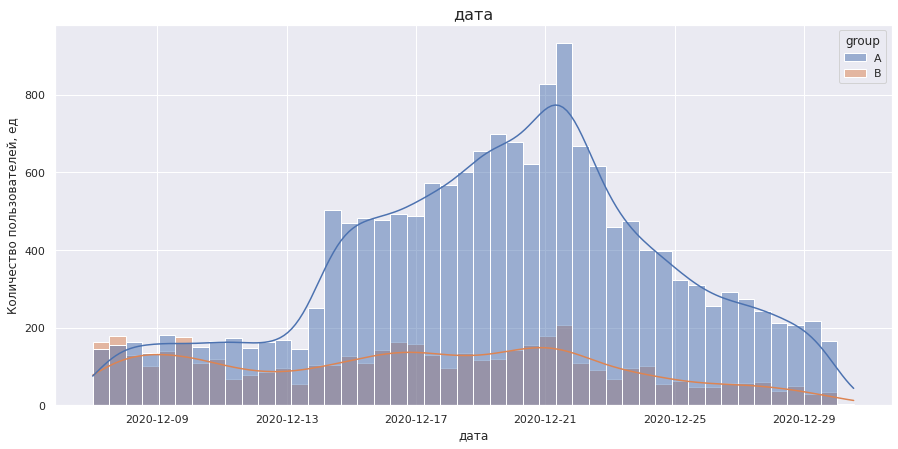

In [ ]:
hist_def(data=df, x='event_dt', 
         hue='group', xlabel='дата')

In [ ]:
# какие события есть в логах, как часто они встречаются
df_a = df.query('group == "A"').groupby('event_name')['user_id'].agg(
    ['count']).sort_values('count', ascending=False).reset_index()
df_a

,event_name,count
0,login,7489
1,product_page,4871
2,purchase,2269
3,product_cart,2263


In [ ]:
# какие события есть в логах, как часто они встречаются
df_b = df.query('group != "A"').groupby('event_name')['user_id'].agg(
    ['count']).sort_values('count', ascending=False).reset_index()
df_b

,event_name,count
0,login,2299
1,product_page,1212
2,product_cart,602
3,purchase,580


- группа А значительно преобладает по колличеству событий по дням
- c 2020-12-07 по 2020-12-13 количество событий было примерно одинаково в каждой группе, затем группа В значительно отстает

## 4.3 Изучение воронки событий

In [ ]:
# доля пользователей, которые хоть раз совершали событие
df_a = df.query('group == "A"').groupby('event_name')['user_id'].agg(
    ['nunique']).sort_values('nunique', ascending=False).reset_index()
df_a = df_a.reindex([0,1,3,2]) 
df_a['pct'] = df_a['nunique'] / df['user_id'].nunique() * 100
df_a

,event_name,nunique,pct
0,login,2407,74.543202
1,product_page,1569,48.590895
3,product_cart,727,22.514710
2,purchase,751,23.257975


In [ ]:
# доля пользователей, которые хоть раз совершали событие
df_b = df.query('group != "A"').groupby('event_name')['user_id'].agg(
    ['nunique']).sort_values('nunique', ascending=False).reset_index()
df_b = df_b.reindex([0,1,3,2]) 
df_b['pct'] = df_b['nunique'] / df['user_id'].nunique() * 100
df_b

,event_name,nunique,pct
0,login,822,25.456798
1,product_page,459,14.214927
3,product_cart,225,6.968102
2,purchase,226,6.999071


- Порядок действия видится таким login ->> product_page ->> product_cart ->> purchase

- можно заметить что оплата в группе А происходит в большем колличестве раз, чем просмотр карточки товара

- конверсия в покупку группы А 23% группы В 7%

In [ ]:
# доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем)
df_a = df.query('group == "A"').groupby('event_name')['user_id'].agg(
    ['nunique']).sort_values('nunique', ascending=False).reset_index()
df_a = df_a.reindex([0,1,3,2]) 
df_a['total_pct'] = df_a['nunique'] / df_a['nunique'].sum() * 100
df_a['ratio_pct'] = (df_a['nunique'] / df_a['nunique'].shift() * 100).fillna(0)
df_a

,event_name,nunique,total_pct,ratio_pct
0,login,2407,44.132747,0.000000
1,product_page,1569,28.767877,65.184877
3,product_cart,727,13.329666,46.335245
2,purchase,751,13.769710,103.301238


In [ ]:
df_b = df.query('group != "A"').groupby('event_name')['user_id'].agg(
    ['nunique']).sort_values('nunique', ascending=False).reset_index()
df_b = df_b.reindex([0,1,3,2]) 
df_b['total_pct'] = df_b['nunique'] / df_b['nunique'].sum() * 100
df_b['ratio_pct'] = (df_b['nunique'] / df_b['nunique'].shift() * 100).fillna(0)
df_b

,event_name,nunique,total_pct,ratio_pct
0,login,822,47.459584,0.000000
1,product_page,459,26.501155,55.839416
3,product_cart,225,12.990762,49.019608
2,purchase,226,13.048499,100.444444


- доля пользователей которые в зависимости от предыдущего шага в двух групах различна. Группа А показывает результат на 2 шаге, группа В лучше на 3 шаге.

In [ ]:
df_a['group'] = 'Group A'
df_b['group'] = 'Group B'
df_fig = pd.concat([df_a, df_b], axis=0)

In [ ]:
df_fig

,event_name,nunique,total_pct,ratio_pct,group
0,login,2407,44.132747,0.000000,Group A
1,product_page,1569,28.767877,65.184877,Group A
3,product_cart,727,13.329666,46.335245,Group A
2,purchase,751,13.769710,103.301238,Group A
0,login,822,47.459584,0.000000,Group B
1,product_page,459,26.501155,55.839416,Group B
3,product_cart,225,12.990762,49.019608,Group B
2,purchase,226,13.048499,100.444444,Group B


In [ ]:
fig = px.funnel(df_fig, x='total_pct', y='event_name', color='group', title='Воронка продаж, процент пользоватeлей от общего числа')
fig.show()

- группа А лучше по всем показателям кроме первого 'login'
- все кто назал на карточку товара купил продукт, приэтом покупок больше чем открытия карточек товара. 

# 👩🏼‍🔬 5. Z-test

In [ ]:
df_z_test = df_a.merge(df_b, on=['event_name'], how='left')

In [ ]:
df_z_test.columns = ['event_name', 'nunique_a', 'total_pct_a', 'ratio_pct_a', 'group_a',
       'nunique_b', 'total_pct_b', 'ratio_pct_b', 'group_b']

In [ ]:
df_z_test = df_z_test.set_index('event_name')

In [ ]:
df_z_test

,nunique_a,total_pct_a,ratio_pct_a,group_a,nunique_b,total_pct_b,ratio_pct_b,group_b
event_name,,,,,,,,
login,2407,44.132747,0.000000,Group A,822,47.459584,0.000000,Group B
product_page,1569,28.767877,65.184877,Group A,459,26.501155,55.839416,Group B
product_cart,727,13.329666,46.335245,Group A,225,12.990762,49.019608,Group B
purchase,751,13.769710,103.301238,Group A,226,13.048499,100.444444,Group B


In [ ]:
# функция для расчета p-value между группами с помощью z-test
def check_hypothesis(successes1, successes2, trials1, trials2, alpha=0.01):

    successes = np.array([successes1, successes2])
    trials = np.array([trials1, trials2])

    # пропорция успехов
    p1 = successes[0]/trials[0]
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / \
        mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(
        p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1])
    )

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        )

In [ ]:
# проверка групп A / B в product_page
check_hypothesis(df_z_test.loc['product_page', 'nunique_a'],
                 df_z_test.loc['product_page', 'nunique_b'],
                 df_z_test.loc['login', 'nunique_a'],
                 df_z_test.loc['login', 'nunique_b'],
                 alpha=0.01)

p-значение:  1.6985303332717194e-06
Отвергаем нулевую гипотезу: между долями есть значимая разница


In [ ]:
# проверка групп A / B в product_page
check_hypothesis(df_z_test.loc['product_cart', 'nunique_a'],
                 df_z_test.loc['product_cart', 'nunique_b'],
                 df_z_test.loc['login', 'nunique_a'],
                 df_z_test.loc['login', 'nunique_b'],
                 alpha=0.01)

p-значение:  0.12427462180036897
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [ ]:
# проверка групп A / B в product_page
check_hypothesis(df_z_test.loc['purchase', 'nunique_a'],
                 df_z_test.loc['purchase', 'nunique_b'],
                 df_z_test.loc['login', 'nunique_a'],
                 df_z_test.loc['login', 'nunique_b'],
                 alpha=0.01)

p-значение:  0.04577952448610634
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


- статистически значимая разница обнаружена на этапе 'login', доли разные
- на других этапах статистически значимой разницы не обнаружено, доли равны.

# 📝 Заключение

- ✔️*Название теста: `recommender_system_test`;*
- ✔️*группы: А — контрольная, B — новая платёжная воронка;*
- ✔️*дата запуска: 2020-12-07;*
- ❌✔️*дата остановки набора новых пользователей: 2020-12-21,* **Были пользователи которые присоеденились уже после даты остановки, данные очищены;**
- ✔️*дата остановки: 2021-01-04;*
- ❌*аудитория: 15% новых пользователей из региона EU*, **пользователей из стран EU около 95%;**
- ✔️*назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;*
- ❌*ожидаемое количество участников теста: 6000*, **фактическое количество 5875.**
- ❌*ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:*
    - ❌*конверсии в просмотр карточек товаров — событие `product_page`,* **группа А на 10% лучше **
    - ❌*просмотры корзины — `product_cart`,* **группа В лучше на 3%**
    - ❌*покупки — `purchase`,* **группа А лучше на 3%.**

> Тест проведен с нарушениями. Количество пользоваталей распредлено не равномерно, среднее количетсво покупок группы А 5.2 группы В 1.5 Ожидаемый результа в конверсию 10% не достигнут, существует статистическая разница между долями на этапе `product_page`, на этапах `product_cart` и `purchase` статистической разницы нет. 

- **Рекомендую считать тест неудачным.**